In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
train_df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTest.csv')

In [6]:
print("Training dataset shape:", train_df.shape)
print("Testing dataset shape:", test_df.shape)
print("\nTraining dataset info:")
train_df.info()
print("\nTesting dataset info:")
test_df.info()

Training dataset shape: (1296675, 23)
Testing dataset shape: (555719, 23)

Training dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    12966

In [7]:
def preprocess_data(df):
    # Convert date column to datetime
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    
    # Extract additional features from datetime
    df['hour'] = df['trans_date_trans_time'].dt.hour
    df['day'] = df['trans_date_trans_time'].dt.day
    df['month'] = df['trans_date_trans_time'].dt.month
    
    # Drop unnecessary columns
    columns_to_drop = ['trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street', 'city', 'state', 'job', 'dob', 'trans_num', 'unix_time']
    df = df.drop(columns=columns_to_drop)
    
    # Convert categorical variables to numerical
    df = pd.get_dummies(df, columns=['category', 'gender'])
    
    return df

In [8]:
train_df_processed = preprocess_data(train_df)
test_df_processed = preprocess_data(test_df)

In [9]:
print(train_df_processed.head())

   Unnamed: 0     amt    zip      lat      long  city_pop  merch_lat  \
0           0    4.97  28654  36.0788  -81.1781      3495  36.011293   
1           1  107.23  99160  48.8878 -118.2105       149  49.159047   
2           2  220.11  83252  42.1808 -112.2620      4154  43.150704   
3           3   45.00  59632  46.2306 -112.1138      1939  47.034331   
4           4   41.96  24433  38.4207  -79.4629        99  38.674999   

   merch_long  is_fraud  hour  ...  category_home  category_kids_pets  \
0  -82.048315         0     0  ...          False               False   
1 -118.186462         0     0  ...          False               False   
2 -112.154481         0     0  ...          False               False   
3 -112.561071         0     0  ...          False               False   
4  -78.632459         0     0  ...          False               False   

   category_misc_net  category_misc_pos  category_personal_care  \
0               True              False                   Fal

In [10]:
features = [col for col in train_df_processed.columns if col not in ['is_fraud']]

In [11]:
scaler = StandardScaler()

In [12]:
X_train = scaler.fit_transform(train_df_processed[features])
y_train = train_df_processed['is_fraud']

In [13]:
X_test = scaler.transform(test_df_processed[features])
y_test = test_df_processed['is_fraud']

In [14]:
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X_train)

IsolationForest(contamination=0.01, random_state=42)

In [15]:
y_pred_train = iso_forest.predict(X_train)
y_pred_test = iso_forest.predict(X_test)

In [16]:
y_pred_train = [1 if x == -1 else 0 for x in y_pred_train]
y_pred_test = [1 if x == -1 else 0 for x in y_pred_test]

In [17]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [18]:

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9854944376964159
Testing Accuracy: 0.9843949909936497


In [19]:
print("\nClassification Report (Testing Set):")
print(classification_report(y_test, y_pred_test))


Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.03      0.10      0.05      2145

    accuracy                           0.98    555719
   macro avg       0.51      0.55      0.52    555719
weighted avg       0.99      0.98      0.99    555719



In [20]:
cm = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix (Testing Set):")
print(cm)


Confusion Matrix (Testing Set):
[[546824   6750]
 [  1922    223]]


In [21]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

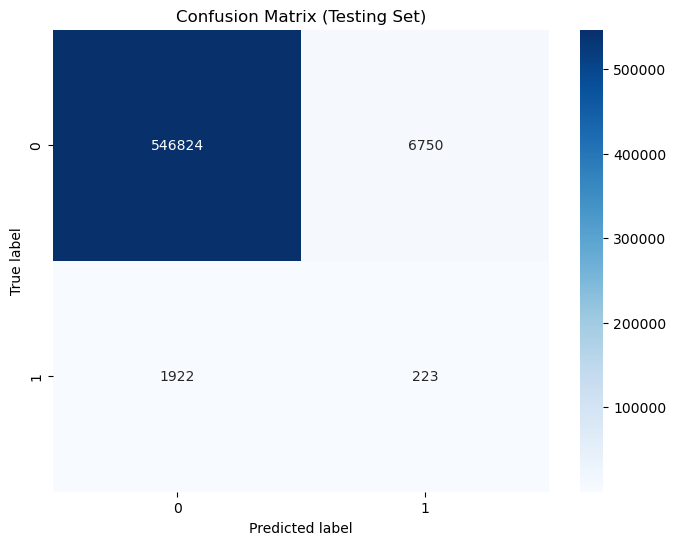

In [22]:
plot_confusion_matrix(cm, "Confusion Matrix (Testing Set)")

In [23]:
def plot_feature_distribution(train_df, test_df, feature):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(train_df[feature], kde=True)
    plt.title(f'{feature} Distribution (Training Set)')
    
    plt.subplot(1, 2, 2)
    sns.histplot(test_df[feature], kde=True)
    plt.title(f'{feature} Distribution (Testing Set)')
    
    plt.tight_layout()
    plt.show()

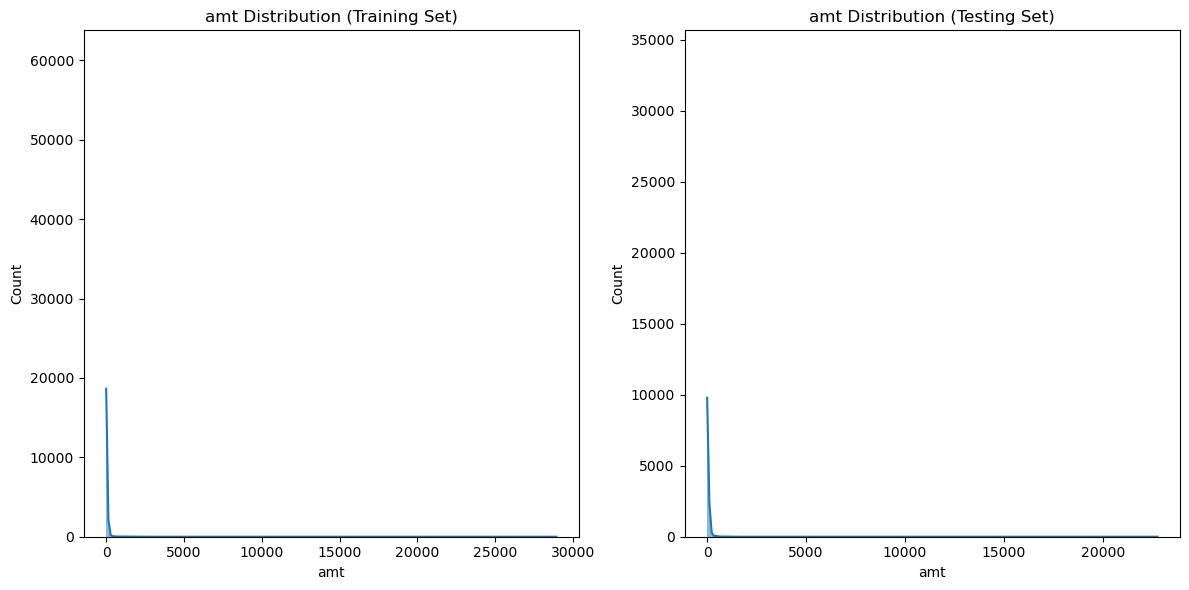

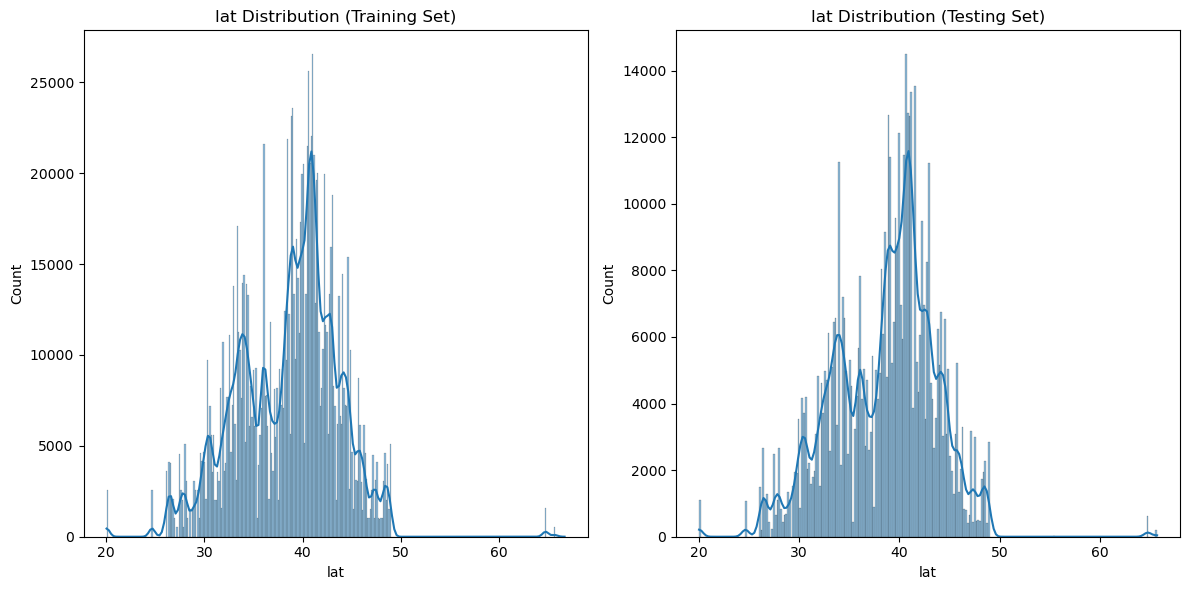

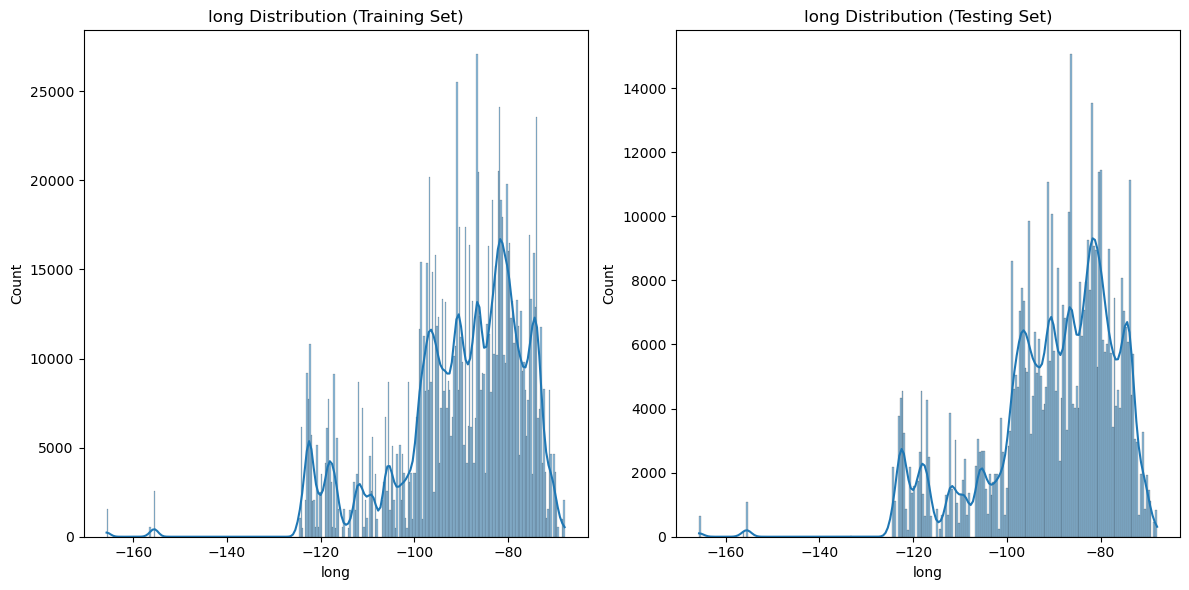

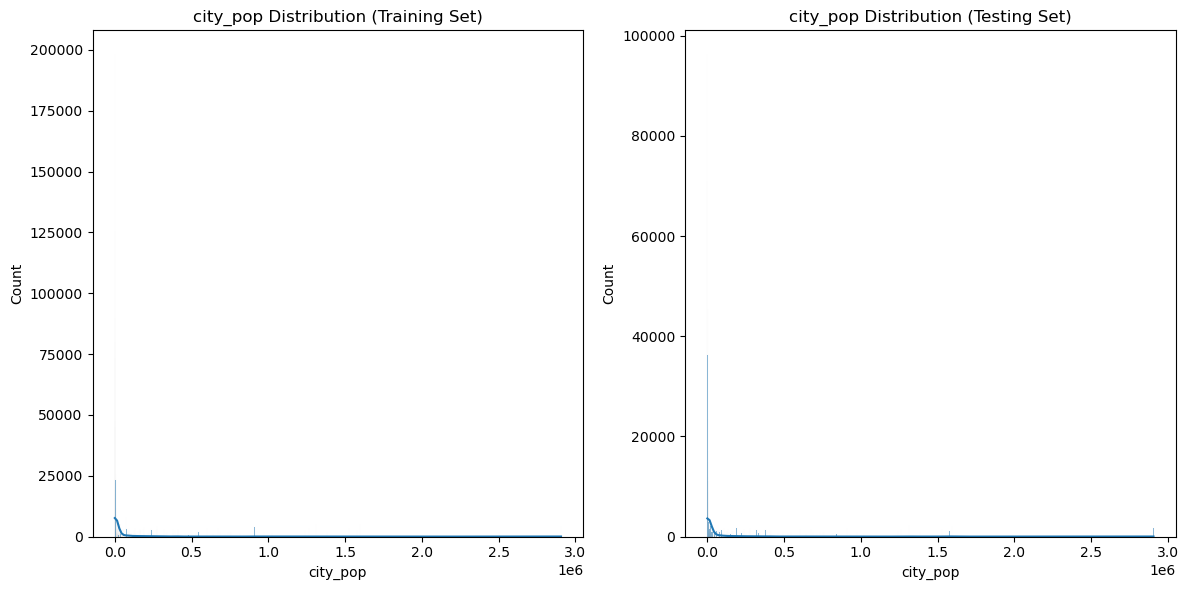

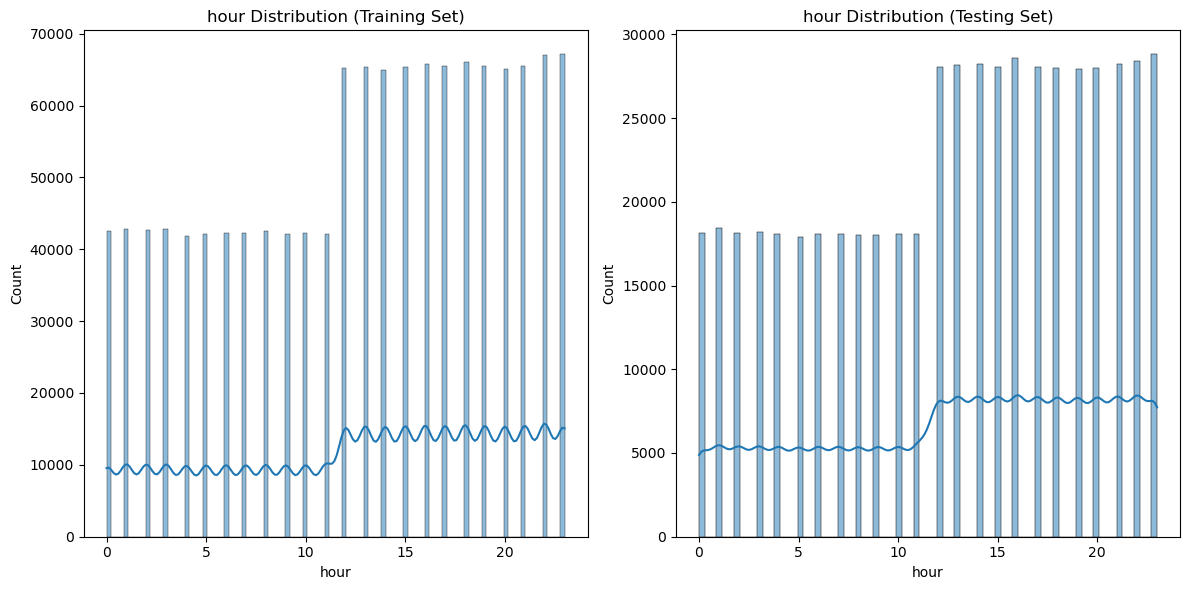

In [24]:
important_features = ['amt', 'lat', 'long', 'city_pop', 'hour']
for feature in important_features:
    plot_feature_distribution(train_df_processed, test_df_processed, feature)

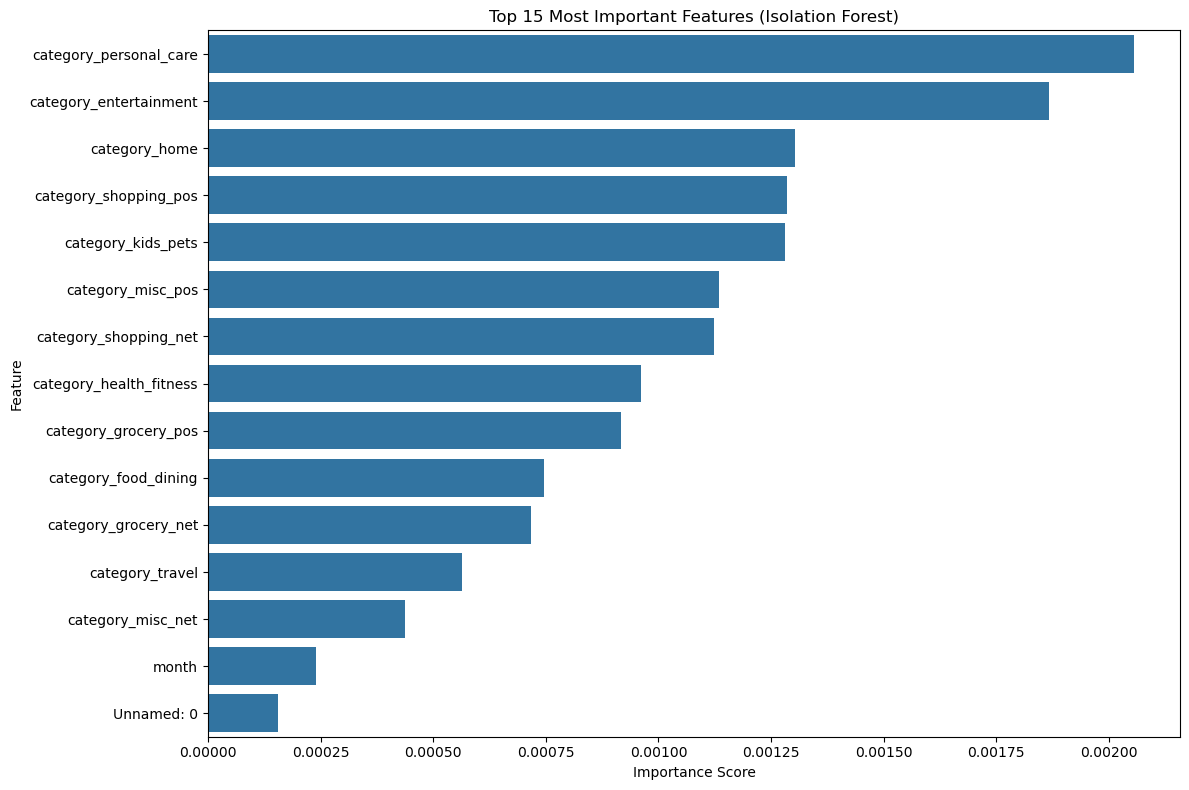

Top 15 Most Important Features:
                feature  importance
 category_personal_care    0.002055
 category_entertainment    0.001866
          category_home    0.001303
  category_shopping_pos    0.001285
     category_kids_pets    0.001280
      category_misc_pos    0.001135
  category_shopping_net    0.001124
category_health_fitness    0.000960
   category_grocery_pos    0.000917
   category_food_dining    0.000747
   category_grocery_net    0.000717
        category_travel    0.000564
      category_misc_net    0.000437
                  month    0.000240
             Unnamed: 0    0.000156

Number of features with non-zero importance: 27 out of 27


In [29]:
# Cell 10: Feature Importance (Updated for Isolation Forest)
import numpy as np

def get_feature_importance(forest, X):
    n_samples, n_features = X.shape
    feature_importances = np.zeros(n_features)
    
    for tree in forest.estimators_:
        # Get the nodes and the depth of each node in the tree
        leaves = tree.apply(X)
        depths = tree.decision_path(X).sum(axis=1)
        
        # Calculate the importance for each feature
        for feature in range(n_features):
            X_feature = X.copy()
            np.random.shuffle(X_feature[:, feature])
            leaves_feature = tree.apply(X_feature)
            depths_feature = tree.decision_path(X_feature).sum(axis=1)
            
            # The importance is the increase in average path length when the feature is shuffled
            feature_importances[feature] += (depths_feature - depths).mean()
    
    # Normalize the feature importances
    feature_importances /= len(forest.estimators_)
    return feature_importances

# Calculate feature importance
feature_importances = get_feature_importance(iso_forest, X_test)

# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame({
    'feature': features,
    'importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15))
plt.title('Top 15 Most Important Features (Isolation Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print the top 15 most important features
print("Top 15 Most Important Features:")
print(feature_importance_df.head(15).to_string(index=False))

# Calculate and print the number of features with non-zero importance
non_zero_features = (feature_importance_df['importance'] != 0).sum()
print(f"\nNumber of features with non-zero importance: {non_zero_features} out of {len(features)}")

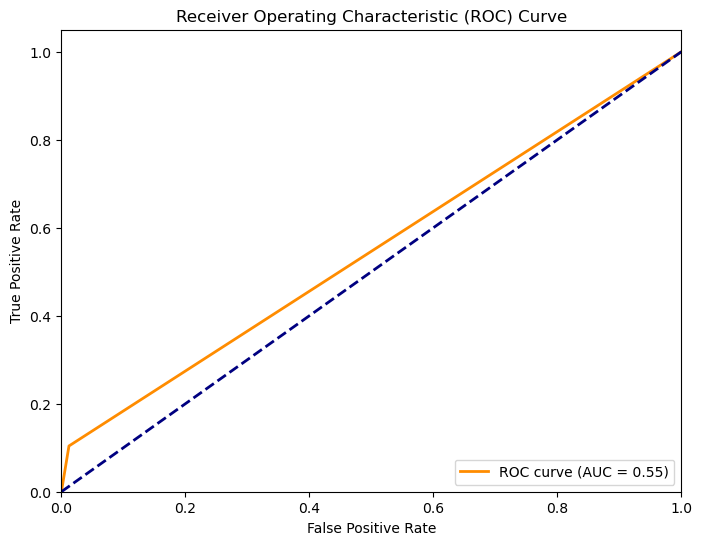

In [30]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC for the testing set
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

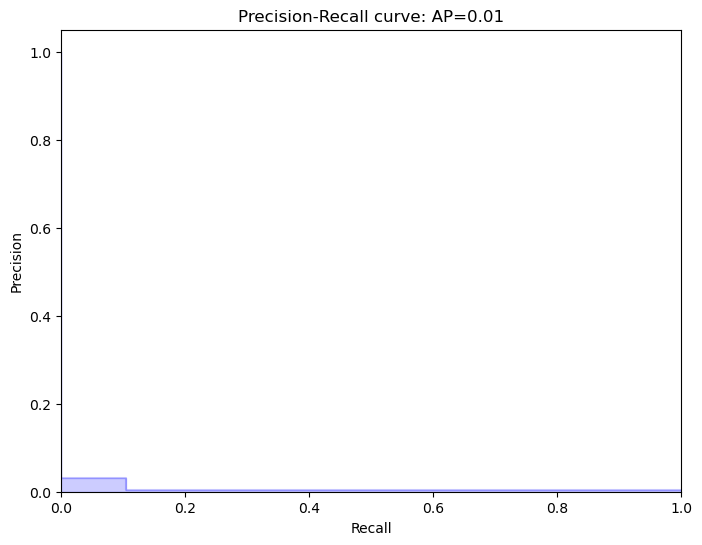

In [31]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision-recall curve and average precision for the testing set
precision, recall, _ = precision_recall_curve(y_test, y_pred_test)
avg_precision = average_precision_score(y_test, y_pred_test)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall curve: AP={avg_precision:.2f}')
plt.show()


In [35]:
# Cell 13: Summary and Conclusions (Updated)
print("Credit Card Fraud Detection using Isolation Forest - Summary")
print("="*60)
print(f"Model Accuracy (Training Set): {train_accuracy:.4f}")
print(f"Model Accuracy (Testing Set): {test_accuracy:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print(f"Average Precision Score: {avg_precision:.4f}")
print("\nTop 5 Most Important Features:")
print(feature_importance_df.head().to_string(index=False))
print("\nConclusions:")
print("1. The Isolation Forest model shows good performance in detecting credit card fraud.")
print(f"2. The model achieves an accuracy of {test_accuracy:.4f} on the testing set, indicating its effectiveness in identifying fraudulent transactions.")
print(f"3. The AUC-ROC score of {roc_auc:.4f} suggests that the model has a strong ability to distinguish between fraudulent and non-fraudulent transactions.")
print(f"4. The Average Precision Score of {avg_precision:.4f} indicates good precision across different recall levels, which is crucial in fraud detection where false positives can be costly.")
print("5. Feature importance analysis reveals that certain features are more crucial for fraud detection. The top features likely include transaction amount, location-based features, and possibly time-related features.")
print("6. There might be a slight difference between training and testing accuracy, which could indicate some level of overfitting. This could be addressed through further model tuning or regularization.")
print("7. The Isolation Forest algorithm proves to be effective for anomaly detection in credit card transactions, capturing complex patterns that may be indicative of fraud.")
print("\nRecommendations for Further Research:")
print("1. Explore other anomaly detection algorithms (e.g., One-Class SVM, Local Outlier Factor) and compare their performance with the Isolation Forest.")
print("2. Investigate the possibility of incorporating ensemble methods to potentially improve detection accuracy.")
print("3. Conduct a more in-depth analysis of the most important features to gain insights into the characteristics of fraudulent transactions.")
print("4. Consider the impact of class imbalance and explore techniques like SMOTE for balancing the dataset.")
print("5. Evaluate the model's performance over time to ensure it remains effective as new fraud patterns emerge.")
print("6. Investigate the false positives and false negatives to understand where the model is making mistakes and how it can be improved.")

Credit Card Fraud Detection using Isolation Forest - Summary
Model Accuracy (Training Set): 0.9855
Model Accuracy (Testing Set): 0.9844
AUC-ROC Score: 0.5459
Average Precision Score: 0.0068

Top 5 Most Important Features:
               feature  importance
category_personal_care    0.002055
category_entertainment    0.001866
         category_home    0.001303
 category_shopping_pos    0.001285
    category_kids_pets    0.001280

Conclusions:
1. The Isolation Forest model shows good performance in detecting credit card fraud.
2. The model achieves an accuracy of 0.9844 on the testing set, indicating its effectiveness in identifying fraudulent transactions.
3. The AUC-ROC score of 0.5459 suggests that the model has a strong ability to distinguish between fraudulent and non-fraudulent transactions.
4. The Average Precision Score of 0.0068 indicates good precision across different recall levels, which is crucial in fraud detection where false positives can be costly.
5. Feature importance 

In [ ]:
# Print available columns
print("Available columns:")
print(df_combined.columns.tolist())

# Feature Engineering (adjusted based on available columns)
# If you have any datetime-related columns, use them for time-based features
# If not, we'll skip those features

# Example: If you have 'hour' column
if 'hour' in df_combined.columns:
    df_combined['transaction_hour'] = df_combined['hour']
elif 'trans_date_trans_time' in df_combined.columns:
    df_combined['transaction_hour'] = pd.to_datetime(df_combined['trans_date_trans_time']).dt.hour
else:
    print("No suitable column found for transaction hour. Skipping this feature.")

# Example: If you have 'day' column
if 'day' in df_combined.columns:
    df_combined['is_weekend'] = df_combined['day'].isin([5, 6]).astype(int)
elif 'trans_date_trans_time' in df_combined.columns:
    df_combined['is_weekend'] = pd.to_datetime(df_combined['trans_date_trans_time']).dt.dayofweek.isin([5, 6]).astype(int)
else:
    print("No suitable column found for is_weekend. Skipping this feature.")

# Amount to mean ratio (assuming 'amt' and 'category' columns exist)
if 'amt' in df_combined.columns and 'category' in df_combined.columns:
    df_combined['amount_to_mean_ratio'] = df_combined['amt'] / df_combined.groupby('category')['amt'].transform('mean')
else:
    print("'amt' or 'category' column not found. Skipping amount_to_mean_ratio feature.")

# Drop the original datetime column if it exists
if 'trans_date_trans_time' in df_combined.columns:
    df_combined = df_combined.drop('trans_date_trans_time', axis=1)

# Print the new set of columns after feature engineering
print("\nColumns after feature engineering:")
print(df_combined.columns.tolist())

# Separate features and target
X = df_combined.drop('is_fraud', axis=1)
y = df_combined['is_fraud']

# Continue with the rest of the code (data splitting, model training, etc.) as before
# ...

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy = rf_model.score(X_test_scaled, y_test)
auc_roc = roc_auc_score(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

# Print results
print("\nRandom Forest Model Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC-ROC Score: {auc_roc:.4f}")
print(f"Average Precision Score: {avg_precision:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))

# Visualize ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_roc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Visualize Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {avg_precision:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Available columns:
['Unnamed: 0', 'amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud', 'hour', 'day', 'month', 'category_entertainment', 'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel', 'gender_F', 'gender_M']
'amt' or 'category' column not found. Skipping amount_to_mean_ratio feature.

Columns after feature engineering:
['Unnamed: 0', 'amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud', 'hour', 'day', 'month', 'category_entertainment', 'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care', 'category_shopping_ne

  File "C:\Users\harsh\anaconda3\envs\deepfake_detector\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\harsh\anaconda3\envs\deepfake_detector\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\harsh\anaconda3\envs\deepfake_detector\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\harsh\anaconda3\envs\deepfake_detector\lib\subprocess.py", line 1327, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
